<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TSA_Gold_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group - 8
CH24M548 - Mounika Chowdary Pamulapati

CH24M571 - Soumya Mukherjee

CH24M577 - Surya Kandala

Dataset : Gold.csv


Steps followed :
1. **Importing the dataset** :
2. **Cleaning the dataset**: Ensured that missing dates were added and forward fill of the data for the missing dates. Dropped NaN records whereever observed.
3. **Stationartiy Check**: Validated if the timeseries is stationary or not by performing ADF and KSS test. For ADF test if p<0.05, then it says the timeseries is stationary. If p>0.05 for KSS test, it indicates the timeseries is stationary.

4. **First Order Differencing & Log Differencing:** Performing first order differencing to make the timeseries stationary.
5. **ACF and PACF:** Compute Auto Correlation and Partial correlation to understand the presence of MA and AR components.
6. **Power Spectral Density:** For a process to be stationary, both mean and variance need to be independent of the absolute time. Hence, validating if Variance is dependent on the absolute time.
7. **Random Walk:** Based on the ACF and PACF values, going with ARMA model of 010 since ACF and PACF results indicate complete white noise.
8. **Akaike's Information Criteria:** Since the forecast is only a straight line, checked the AIC values for models starting from 000 till 332. Chose that model which has less AIC value
9. **Train, Test & Generate Forecast:** Generated the forecast for 122 model which got less AIC value in step 7.
10. **MSE, RMSE, MAPE:** Identify the Mean Square Error and Root Mean Square Error to check the residual details.
11. **Alternate Non-Lionear models:** Since we have variance as a function of absolute time, linear models might not be the right choice to move ahead, hence trying out the non-linear models ARCH and GARCH to model the data.


--- Starting off by installing dependecies ---


In [ ]:
!pip install pandas seaborn matplotlib

         DATE   VALUE
0  1995-01-03  381.40
1  1995-01-04  378.25
2  1995-01-05  375.00
3  1995-01-06  375.90
4  1995-01-09  372.45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526 entries, 0 to 5525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    5526 non-null   object 
 1   VALUE   5526 non-null   float64
dtypes: float64(1), object(1)
memory usage: 86.5+ KB
None
             VALUE
count  5526.000000
mean    745.163409
std     472.874736
min     252.900000
25%     329.737500
50%     499.850000
75%    1197.650000
max    1896.500000


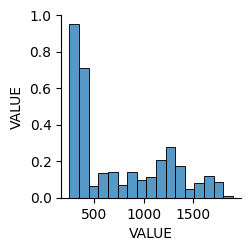

ValueError: could not convert string to float: '1995-01-03'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data from 'Gold.csv'.

file_name = 'Gold.csv'
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print("Error: 'Gold.csv' not found.")
    # You might want to add code to handle the file upload here, e.g. using files.upload()
    exit()
except Exception as e:
    print(f"An error occurred while reading 'Gold.csv': {e}")
    exit()


# Basic data exploration and visualization
print(data.head())
print(data.info())
print(data.describe())


# Example visualizations using seaborn
# Replace 'column1' and 'column2' with actual column names from your data.
# Customize the plots as needed.

sns.pairplot(data)
plt.show()

sns.heatmap(data.corr(), annot=True)
plt.show()

# Example: Plot a specific column over time (if you have a date/time column)
if 'Date' in data.columns:  # Adjust 'Date' if your date column has a different name
  try:
      data['Date'] = pd.to_datetime(data['Date']) # Convert date column to datetime objects
      plt.figure(figsize=(10, 6))
      sns.lineplot(x='Date', y='Gold_Price', data=data)  # Replace 'Gold_Price' with actual column name
      plt.xlabel('Date')
      plt.ylabel('Gold Price')
      plt.title('Gold Price Over Time')
      plt.xticks(rotation=45) # Rotate x-axis labels for better readability
      plt.tight_layout()
      plt.show()
  except ValueError:
      print("Error converting 'Date' column to datetime objects. Ensure valid date format")
else:
    print("No 'Date' column found in the dataset.")


# Add more visualizations as needed, based on your data and analysis goals